# PyTorch Workflow

Let's explore PyTorch end-to-end workflow.

In [2]:
# Workflow 
what_were_covering = {1: "data(prepare and load)",
                      2: "build model",
                      3: "fitting the model (training)",
                      4: "making predictions and evaluting model (inference)",
                      5: "putting it all together"}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model (training)',
 4: 'making predictions and evaluting model (inference)',
 5: 'putting it all together'}

In [10]:
import torch 
from torch import nn # nn contains all PyTorch's building blocks for neural networks 
import matplotlib.pyplot as plt 

# Check python version
print(f"PyTorch and cuda version: {torch.__version__}")
if torch.cuda.is_available():
    device = "cuda"
    print("Accelerator/Cuda/GPU is available!")
else:
    device = "cpu"
    print("Accelerator/Cuda/GPU is not available ;C, CPU mode")

PyTorch and cuda version: 1.13.1+cu117
Accelerator/Cuda/GPU is available!


## 1. Data (preparing and loading)

* Excel 
* Images
* Videos
* Audio 
* DNA 
* Text
* (...)

Machine learning: 
1. Get data into numerical representation
2. Build model to learn patterns in that numerical representation 

In [ ]:
# Create artificial data with know pattern (linnear function)
weight = 0.7 
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Adds extra dimension, sol we have (1,10)
y = weight * X + bias

X[:10], y[:10] # That notation is to show the first 10 elements

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y) # 50 elements 

(50, 50)

In [ ]:
# Spliting data into train, test, validation (basic machine learning step)
# Guide:
# Train ->  60-80%
# Validation -> 10-20%
# Test -> 10-20%

# Note: Train + validation = design split/partition

train_split = int(0.8 * len(X)) # 50 * 0.8
X_train, y_train  = X[:train_split], y[:train_split] # Taking first 50*0.8 data
X_test, y_test = X[train_split:], y[train_split:] # Taking the rest 

len(X_train), len(X_test), len(y_train), len(y_test)
# 40 data to train, 10 to test

(40, 10, 40, 10)

In [26]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    '''
    Plots training data, test data and compares predictions
    '''

    # Plot training data in blue 
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=8, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=8 ,label="Test data")
    
    # ¿Predictions? -> Plot if exists
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=8, labels="Predictions")
    
    
    # Show the legend
    plt.legend(prop={"size":14})

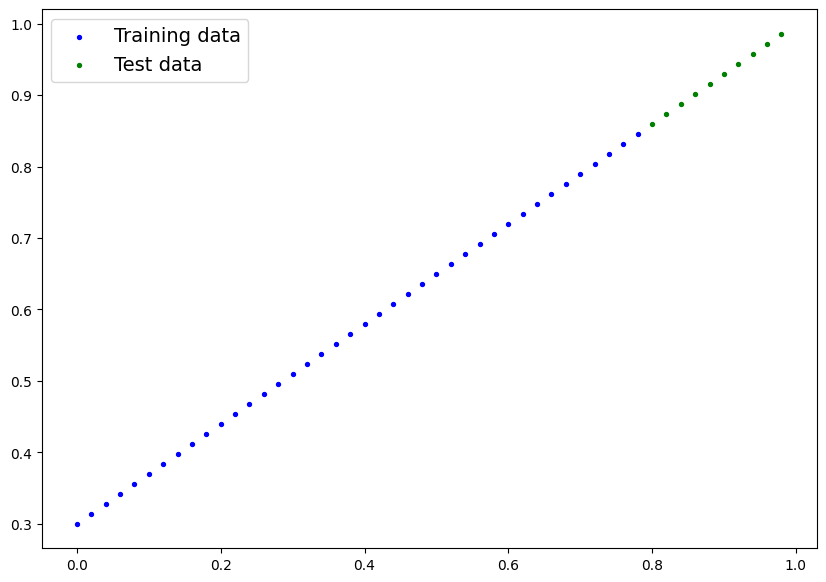

In [27]:
plot_predictions()

## 2. Bulding first PyTorch model



In [ ]:
# Create a linear regresion model class

class LinearRegresionModel(torch.nn.Module): ## Almost everything in PyTorch inherist from nn.Module
    def __init__(self):
        super().__init__()
        # We use the sublcass nn.Parameter to create the, of course, parameters
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float)) # Creates attribute "weights" 
        # Parameter for bias
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
        # Forward method to define the computation in the model
        def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input data
            return  self.weights * x + self.bias # Linear regresion